In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid", palette="tab10", rc={"figure.figsize": (6.4, 4.8)})
pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv("dataset.csv")

print("Shape:", df.shape)
df.info()
df.describe().T

Shape: (517754, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtype

,count,mean,std,min,25%,50%,75%,max
id,517754.0,258876.500000,149462.849975,0.0,129438.25,258876.50,388314.75,517753.0
num_lanes,517754.0,2.491511,1.120434,1.0,1.00,2.00,3.00,4.0
curvature,517754.0,0.488719,0.272563,0.0,0.26,0.51,0.71,1.0
speed_limit,517754.0,46.112575,15.788521,25.0,35.00,45.00,60.00,70.0
num_reported_accidents,517754.0,1.187970,0.895961,0.0,1.00,1.00,2.00,7.0
accident_risk,517754.0,0.352377,0.166417,0.0,0.23,0.34,0.46,1.0


# Exploratory Data Analysis (EDA)

## 1. Data Cleaning and Quality Check


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Missing Values Percentage:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Check for duplicates
print("\n" + "="*50)
print(f"Total duplicate rows: {df.duplicated().sum()}")

# Check data types
print("\n" + "="*50)
print("Data Types:")
print(df.dtypes)

# Check for outliers in numerical columns (using IQR method)
print("\n" + "="*50)
print("Outlier Detection (IQR Method):")
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if col != 'id':  # Skip ID column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")


Missing Values:
id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

Missing Values Percentage:
id                        0.0
road_type                 0.0
num_lanes                 0.0
curvature                 0.0
speed_limit               0.0
lighting                  0.0
weather                   0.0
road_signs_present        0.0
public_road               0.0
time_of_day               0.0
holiday                   0.0
school_season             0.0
num_reported_accidents    0.0
accident_risk             0.0
dtype: float64

Total duplicate rows: 0

Data Types:
id                          int64
road_type                  object
num_lanes 

## 2. Univariate Analysis - Numerical Variables


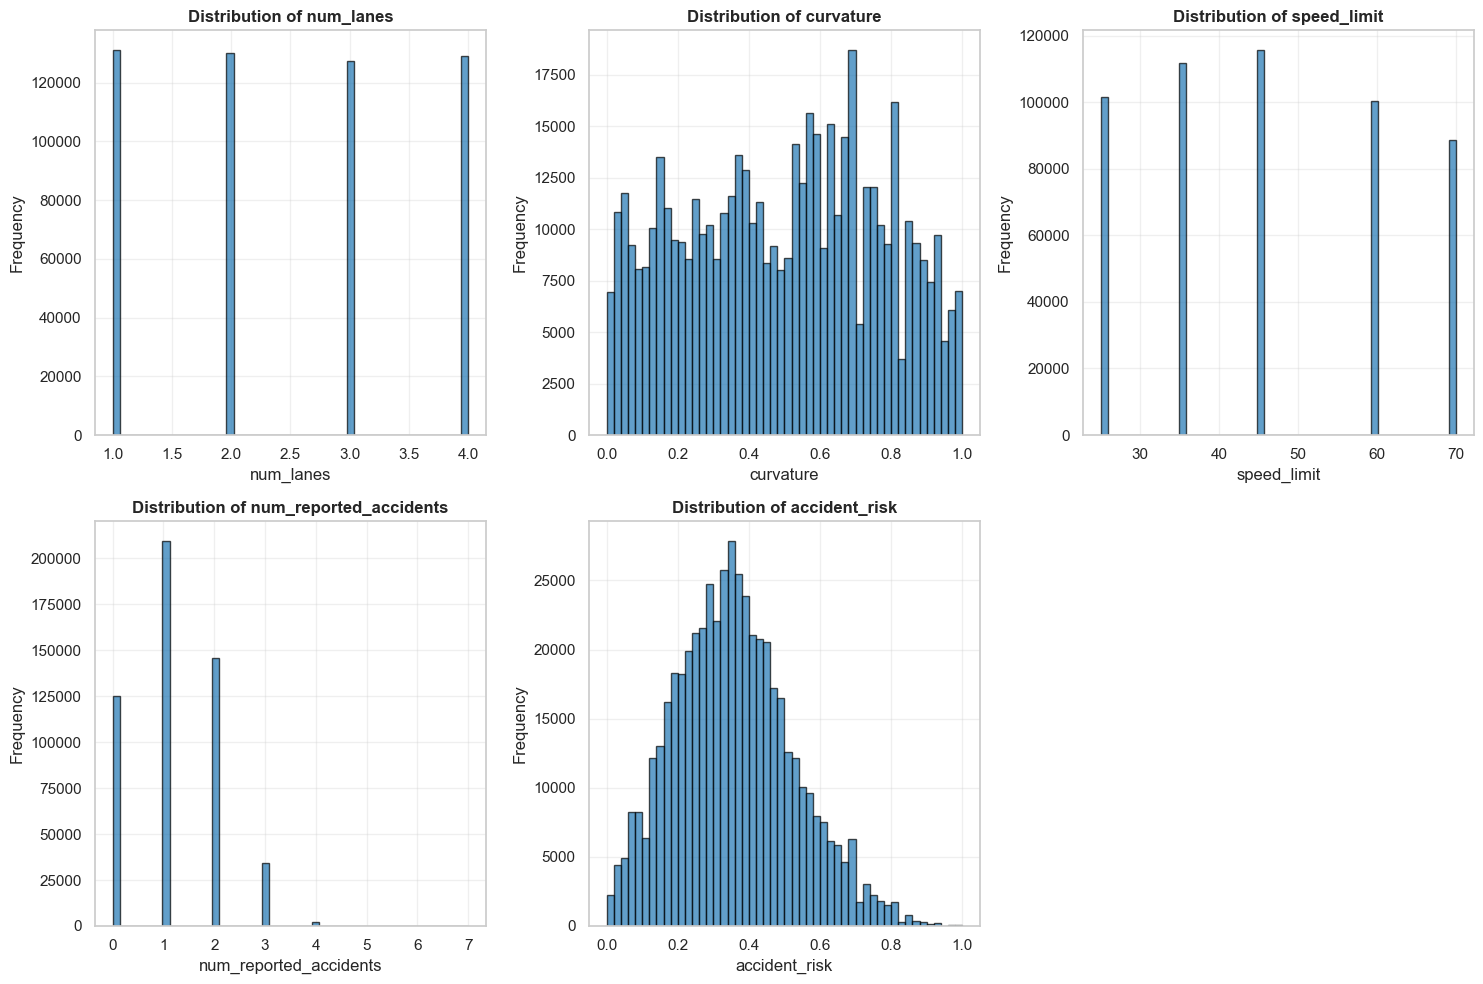

In [6]:
# Select numerical columns (excluding ID)
numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'id']

# Create histograms for all numerical variables
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


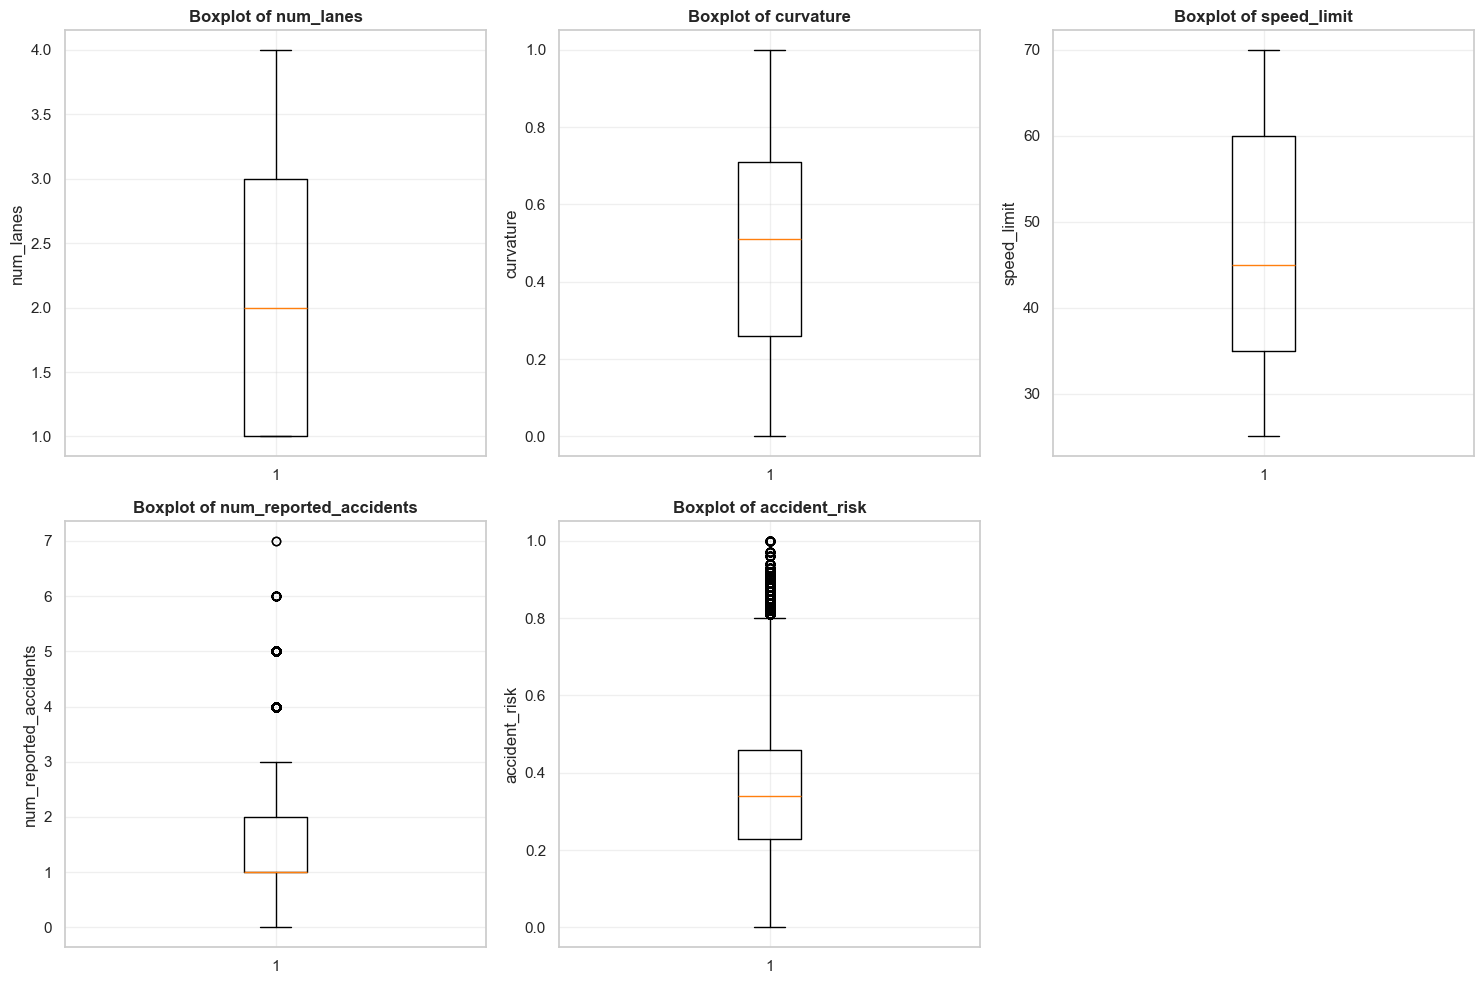

In [7]:
# Boxplots for numerical variables to identify outliers and distributions
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], vert=True)
    axes[idx].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3)

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


## 3. Univariate Analysis - Categorical Variables


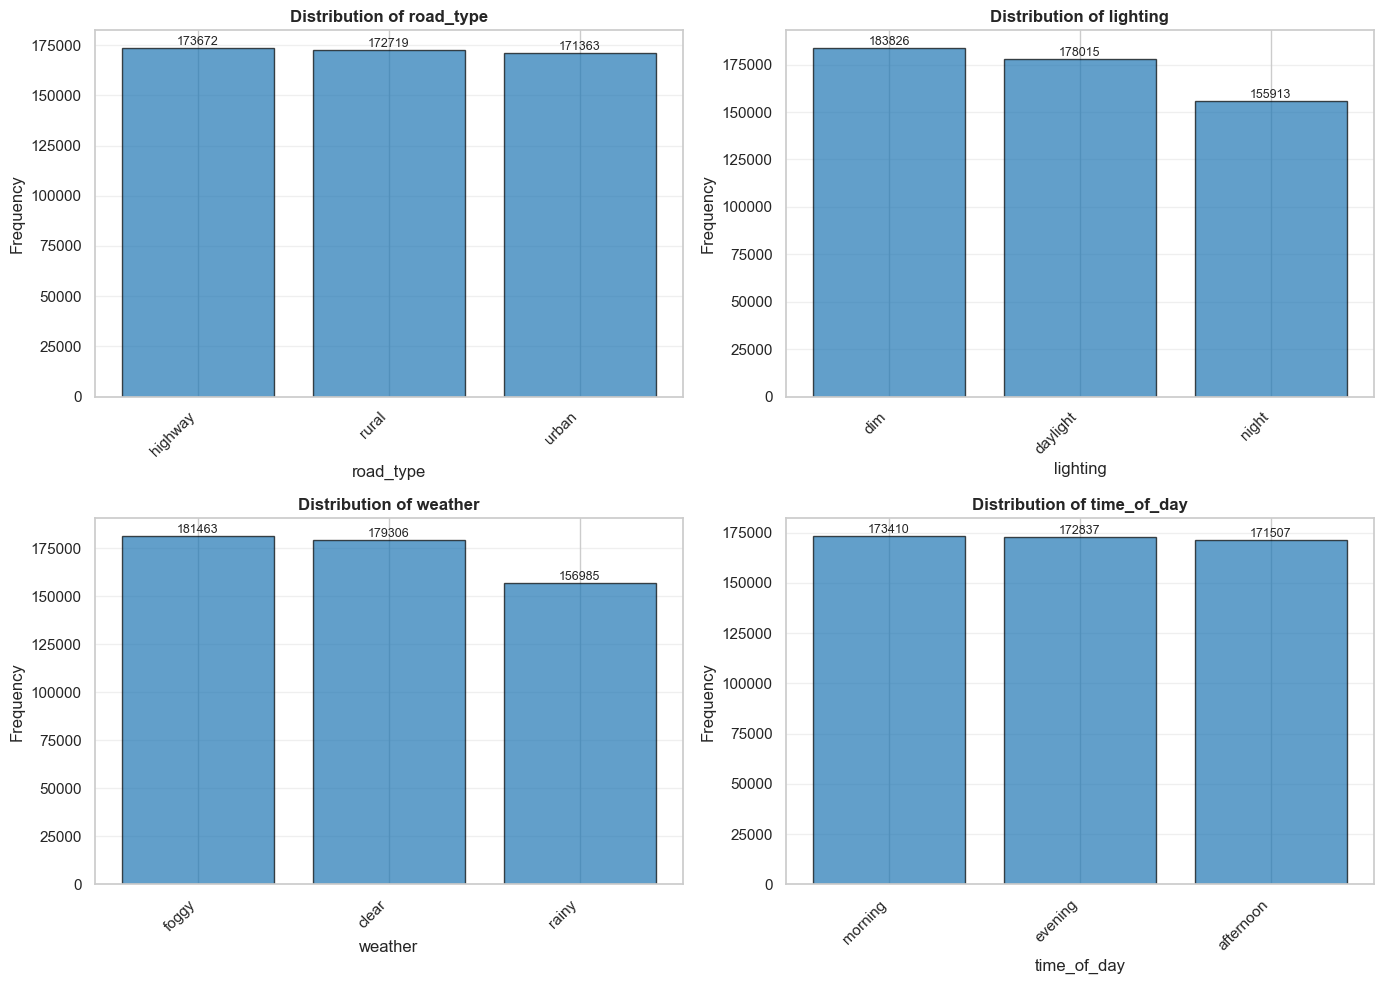

In [8]:
# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Create bar plots for categorical variables
n_cat = len(categorical_cols)
n_cols_cat = 2
n_rows_cat = (n_cat + n_cols_cat - 1) // n_cols_cat
fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(14, 5*n_rows_cat))
axes = axes.flatten() if n_rows_cat > 1 else [axes] if n_cols_cat == 1 else axes

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add count labels on bars
    for i, v in enumerate(value_counts.values):
        axes[idx].text(i, v, str(v), ha='center', va='bottom', fontsize=9)

# Hide unused subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [9]:
# Summary statistics for categorical variables
print("Categorical Variables Summary:")
print("="*60)
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")


Categorical Variables Summary:

road_type:
road_type
highway    173672
rural      172719
urban      171363
Name: count, dtype: int64
Unique values: 3

lighting:
lighting
dim         183826
daylight    178015
night       155913
Name: count, dtype: int64
Unique values: 3

weather:
weather
foggy    181463
clear    179306
rainy    156985
Name: count, dtype: int64
Unique values: 3

time_of_day:
time_of_day
morning      173410
evening      172837
afternoon    171507
Name: count, dtype: int64
Unique values: 3


## 4. Bivariate Analysis - Relationships between Variables


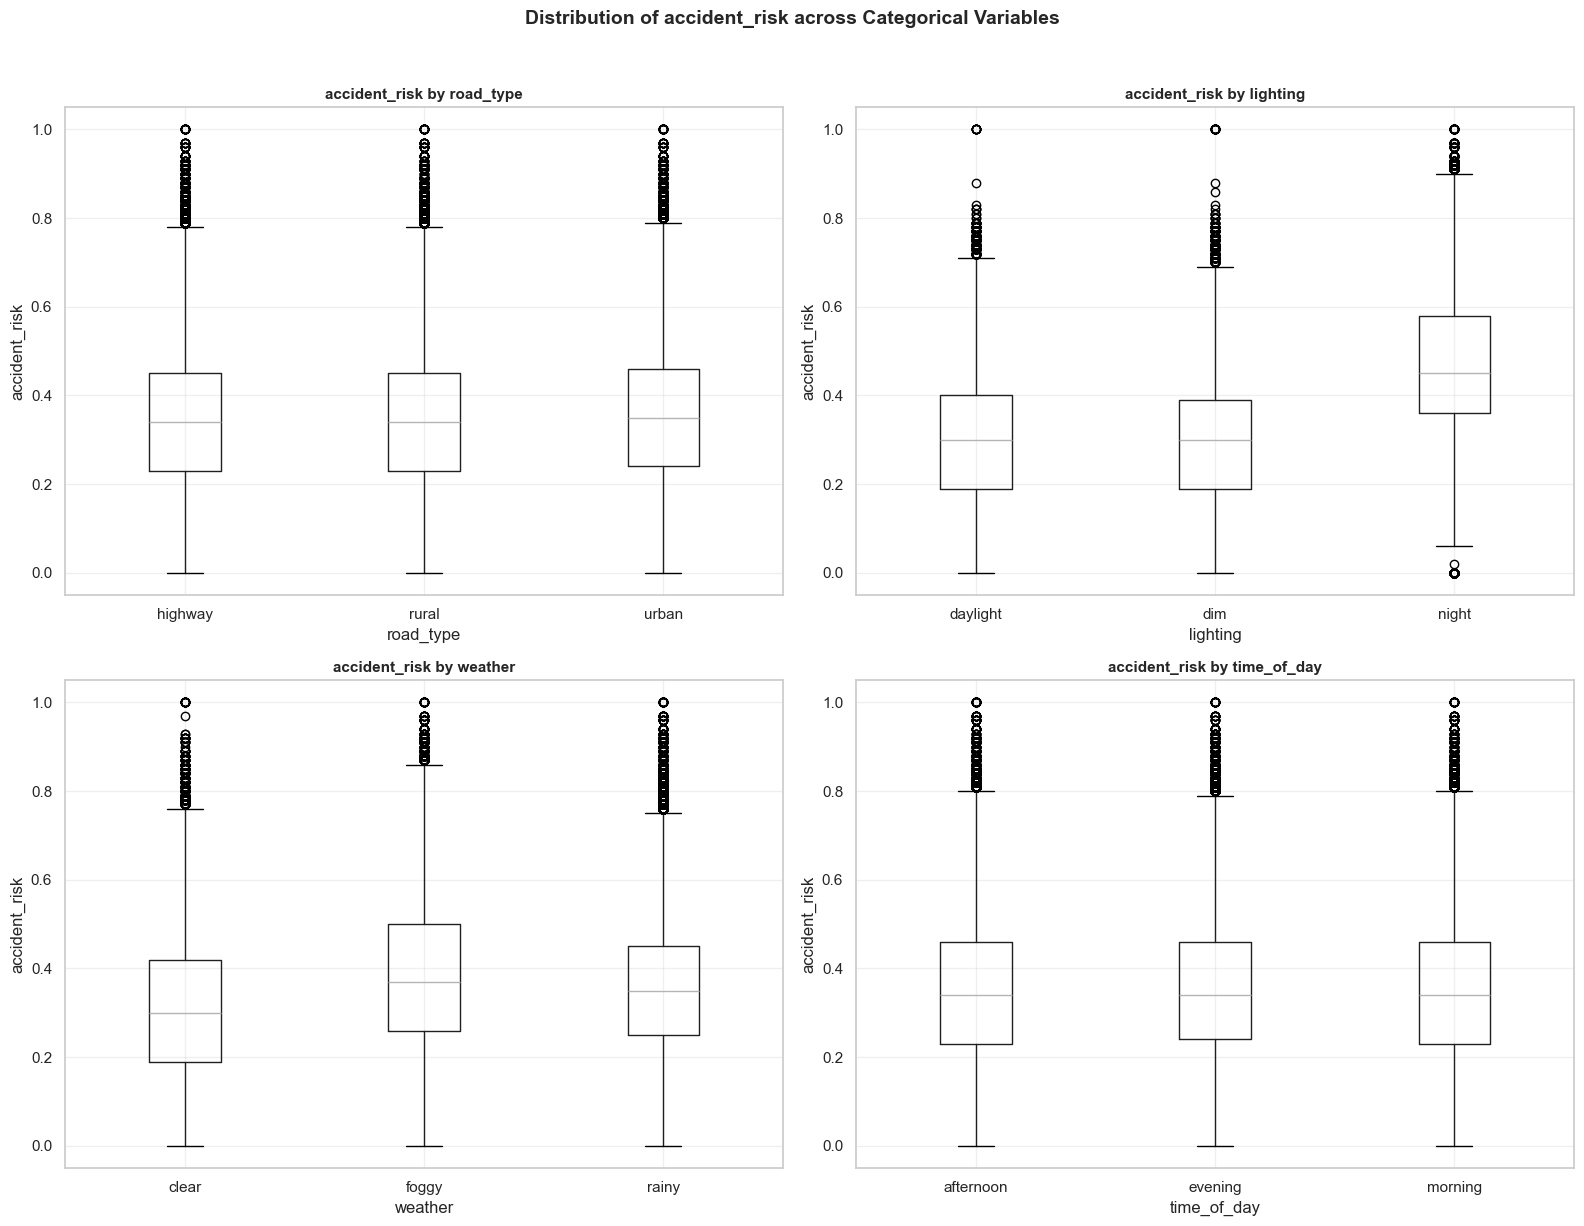

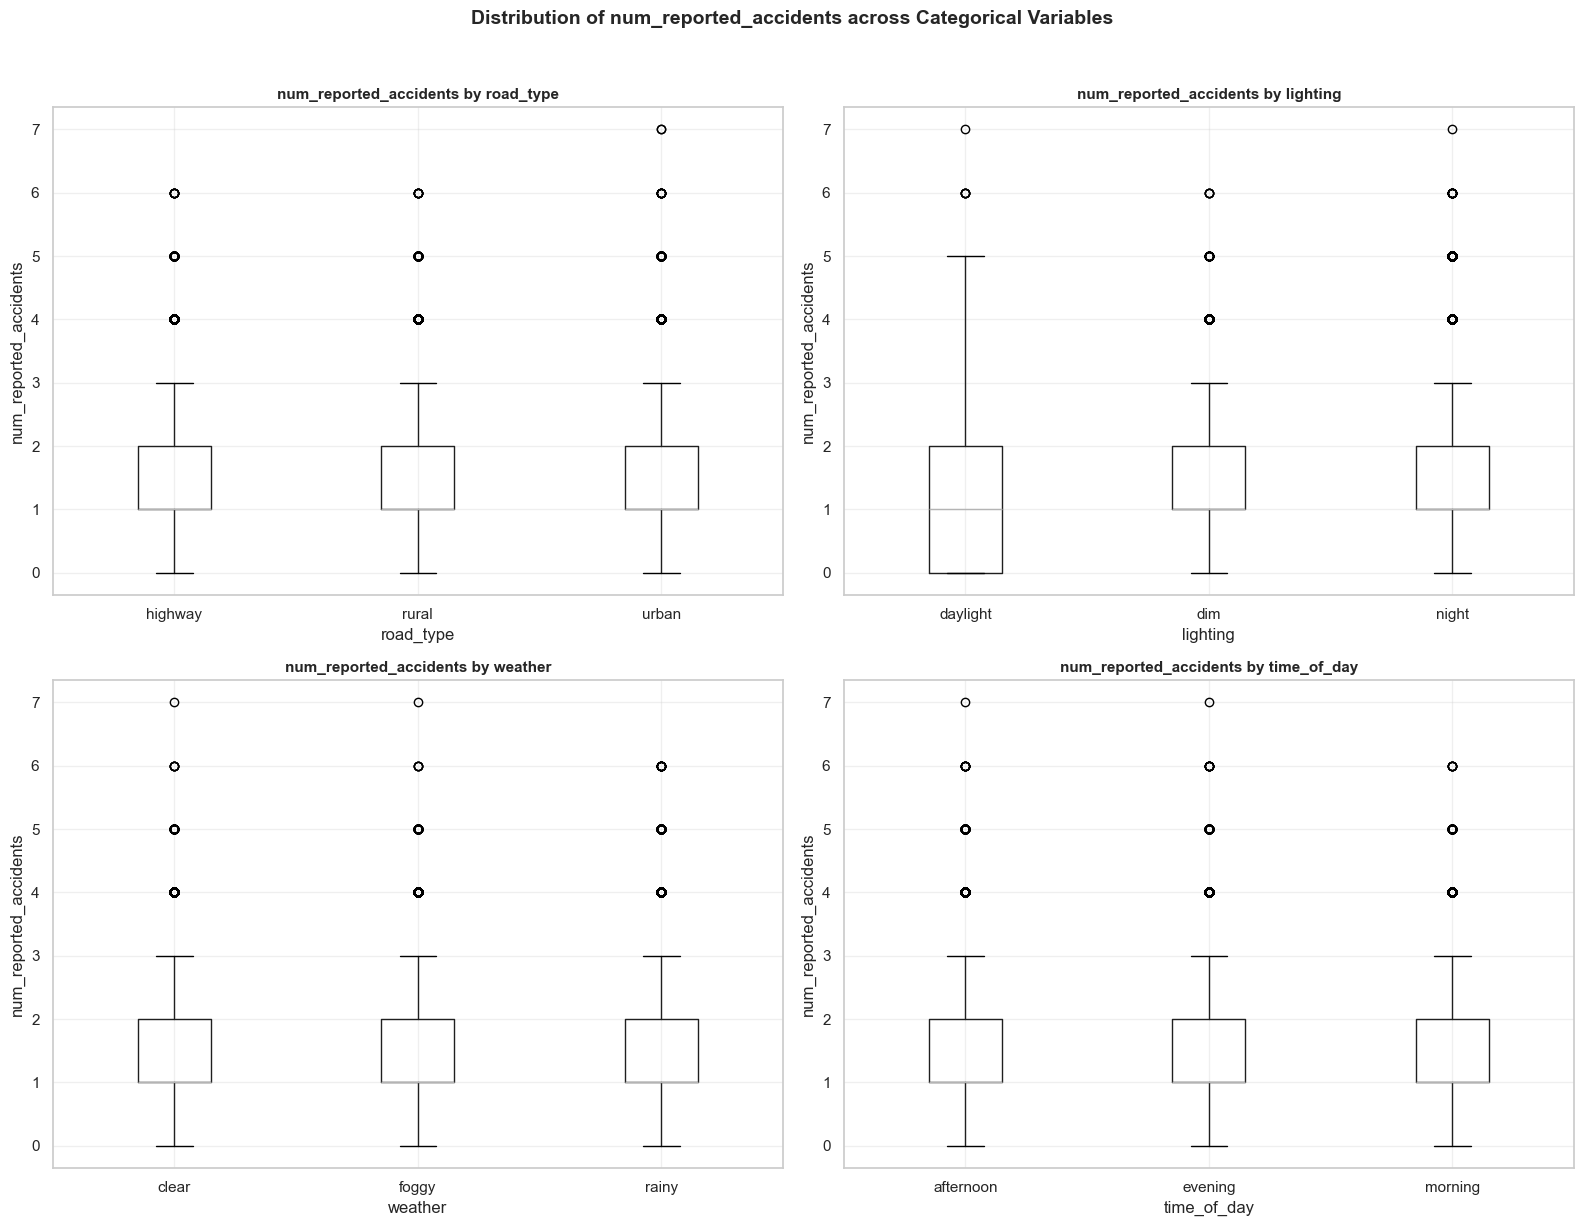

In [10]:
# Boxplots: Categorical vs Numerical (focusing on accident_risk and num_reported_accidents)
target_vars = ['accident_risk', 'num_reported_accidents']

for target_var in target_vars:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    for idx, cat_col in enumerate(categorical_cols[:4]):  # First 4 categorical variables
        df.boxplot(column=target_var, by=cat_col, ax=axes[idx])
        axes[idx].set_title(f'{target_var} by {cat_col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(cat_col)
        axes[idx].set_ylabel(target_var)
        axes[idx].grid(True, alpha=0.3)
    
    # Hide unused subplots
    for idx in range(len(categorical_cols[:4]), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'Distribution of {target_var} across Categorical Variables', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


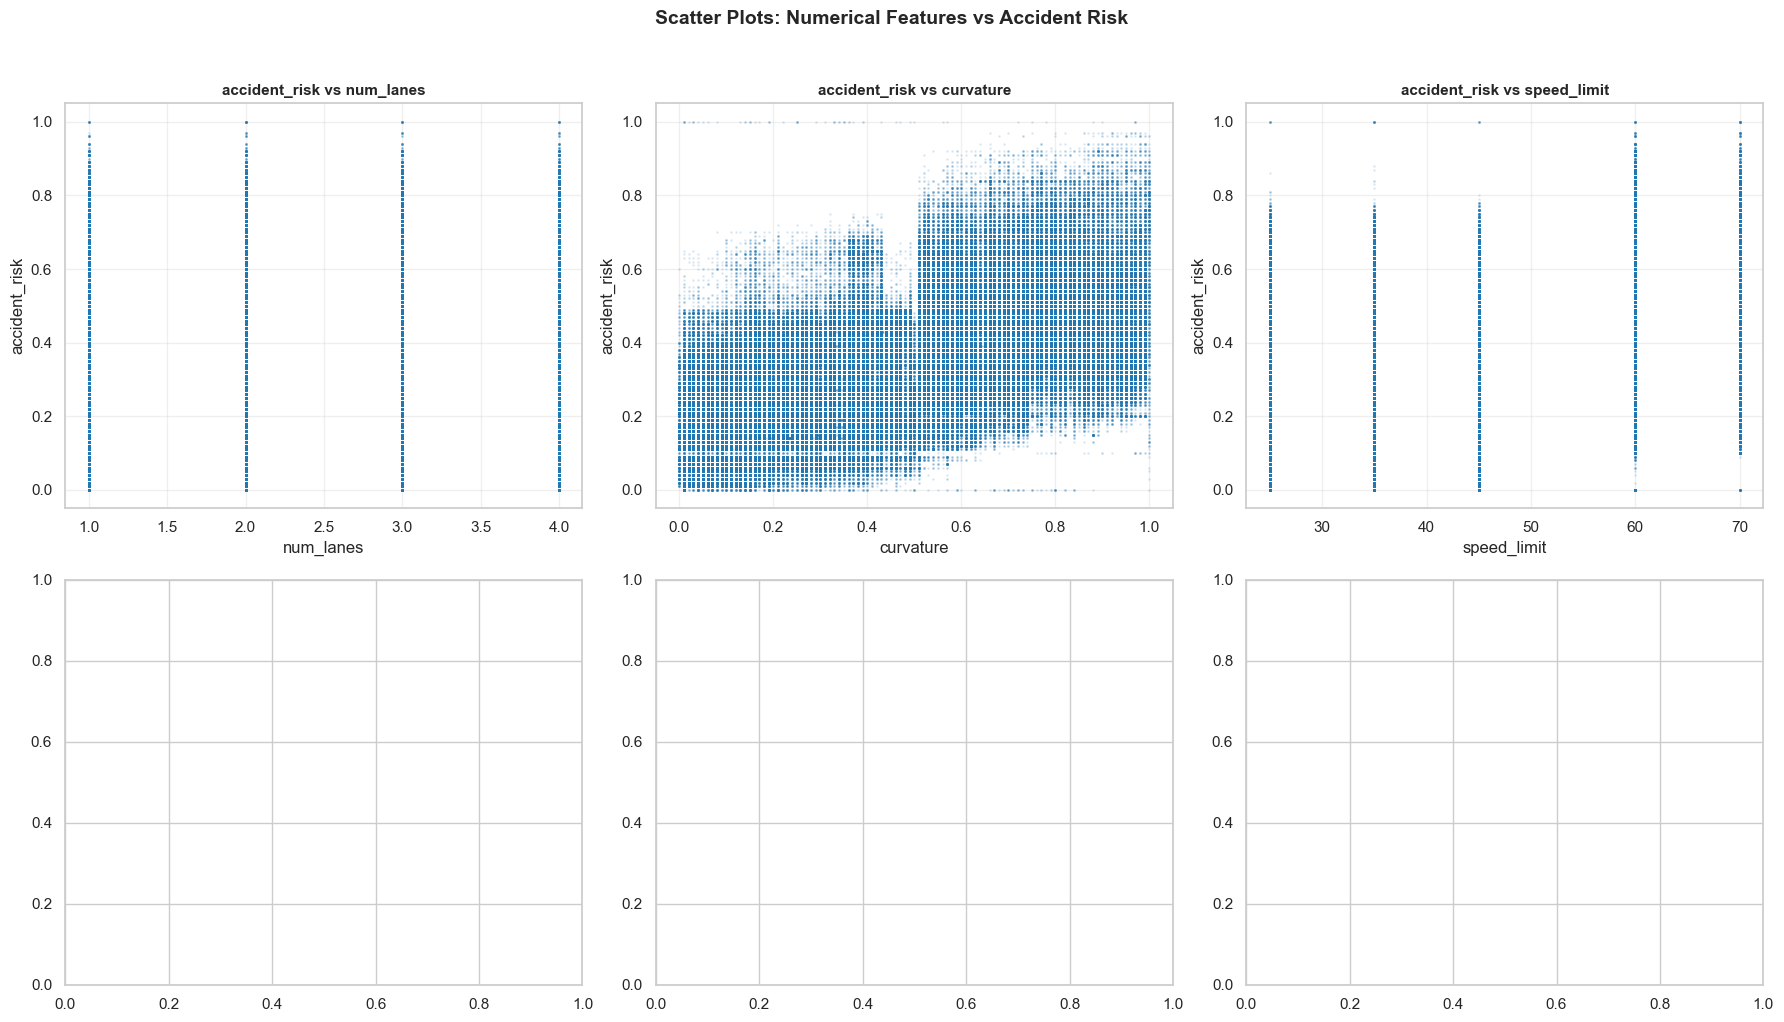

In [11]:
# Scatter plots for numerical relationships
# Focus on relationships with accident_risk and num_reported_accidents
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

numerical_features = [col for col in numerical_cols if col not in ['accident_risk', 'num_reported_accidents']]

for idx, feature in enumerate(numerical_features[:6]):
    axes[idx].scatter(df[feature], df['accident_risk'], alpha=0.1, s=1)
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('accident_risk')
    axes[idx].set_title(f'accident_risk vs {feature}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Scatter Plots: Numerical Features vs Accident Risk', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


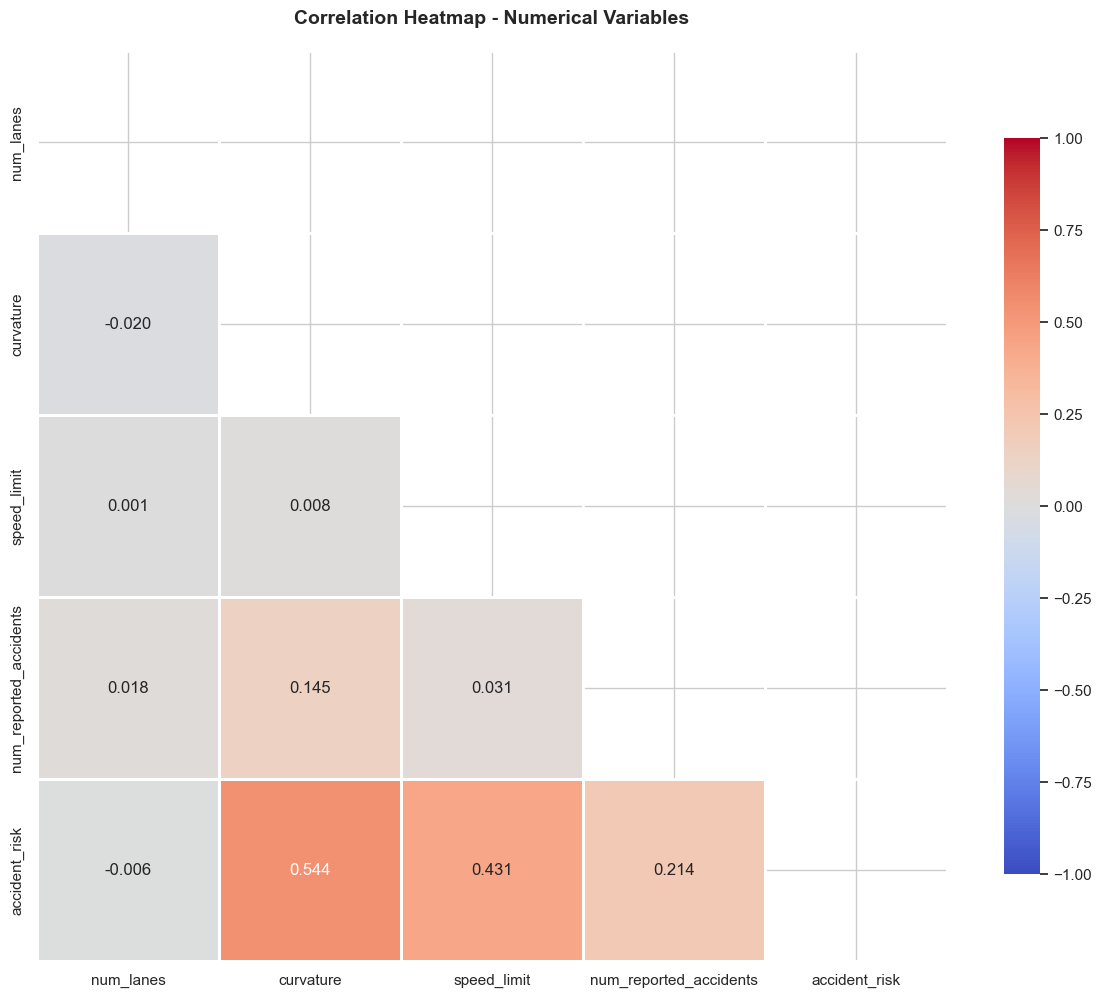


Correlation with accident_risk:
curvature                     :  0.5439
speed_limit                   :  0.4309
num_reported_accidents        :  0.2139
num_lanes                     : -0.0060


In [12]:
# Correlation matrix for numerical variables
correlation_matrix = df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Numerical Variables', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlation values with accident_risk
print("\nCorrelation with accident_risk:")
print("="*50)
corr_with_target = correlation_matrix['accident_risk'].sort_values(ascending=False)
for var, corr in corr_with_target.items():
    if var != 'accident_risk':
        print(f"{var:30s}: {corr:7.4f}")


## 6. Contingency Tables - Categorical Relationships


In [13]:
# Create contingency tables for categorical variables
# Analyze relationships between categorical variables and target (accident_risk binned)
df['accident_risk_category'] = pd.cut(df['accident_risk'], 
                                       bins=[0, 0.25, 0.5, 0.75, 1.0], 
                                       labels=['Low', 'Medium', 'High', 'Very High'])

print("Contingency Tables:")
print("="*60)

# Road type vs Accident risk category
print("\n1. Road Type vs Accident Risk Category:")
ct1 = pd.crosstab(df['road_type'], df['accident_risk_category'], margins=True)
print(ct1)
print("\nRow percentages:")
print(pd.crosstab(df['road_type'], df['accident_risk_category'], normalize='index') * 100)

# Weather vs Accident risk category
print("\n" + "="*60)
print("\n2. Weather vs Accident Risk Category:")
ct2 = pd.crosstab(df['weather'], df['accident_risk_category'], margins=True)
print(ct2)
print("\nRow percentages:")
print(pd.crosstab(df['weather'], df['accident_risk_category'], normalize='index') * 100)

# Lighting vs Accident risk category
print("\n" + "="*60)
print("\n3. Lighting vs Accident Risk Category:")
ct3 = pd.crosstab(df['lighting'], df['accident_risk_category'], margins=True)
print(ct3)
print("\nRow percentages:")
print(pd.crosstab(df['lighting'], df['accident_risk_category'], normalize='index') * 100)

# Time of day vs Accident risk category
print("\n" + "="*60)
print("\n4. Time of Day vs Accident Risk Category:")
ct4 = pd.crosstab(df['time_of_day'], df['accident_risk_category'], margins=True)
print(ct4)
print("\nRow percentages:")
print(pd.crosstab(df['time_of_day'], df['accident_risk_category'], normalize='index') * 100)


Contingency Tables:

1. Road Type vs Accident Risk Category:
accident_risk_category     Low  Medium   High  Very High     All
road_type                                                       
highway                  51814   91748  27647       2258  173467
rural                    52106   90527  27254       2635  172522
urban                    48815   90963  28936       2443  171157
All                     152735  273238  83837       7336  517146

Row percentages:
accident_risk_category        Low     Medium       High  Very High
road_type                                                         
highway                 29.869658  52.890752  15.937902   1.301689
rural                   30.202525  52.472728  15.797406   1.527341
urban                   28.520598  53.145942  16.906115   1.427344


2. Weather vs Accident Risk Category:
accident_risk_category     Low  Medium   High  Very High     All
weather                                                         
clear                    6

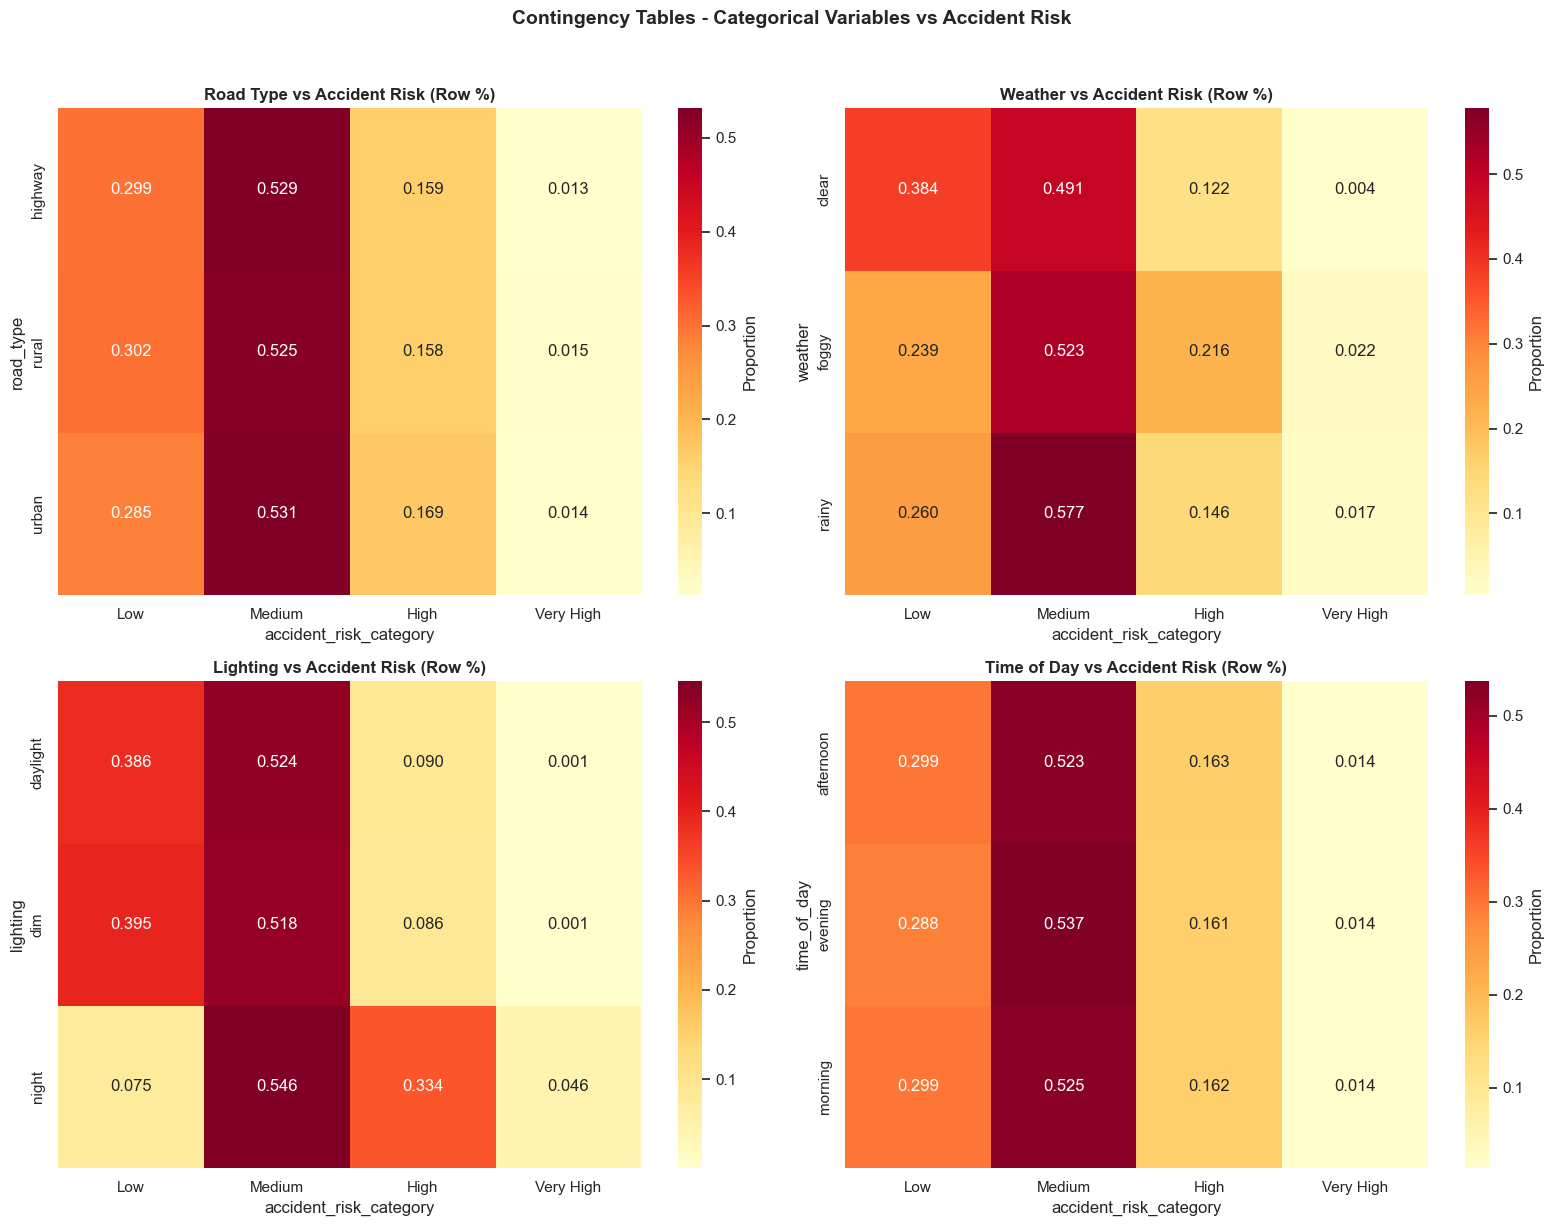

In [14]:
# Visualize contingency tables as heatmaps
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Road type
ct1_norm = pd.crosstab(df['road_type'], df['accident_risk_category'], normalize='index')
sns.heatmap(ct1_norm, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[0], cbar_kws={'label': 'Proportion'})
axes[0].set_title('Road Type vs Accident Risk (Row %)', fontweight='bold')

# Weather
ct2_norm = pd.crosstab(df['weather'], df['accident_risk_category'], normalize='index')
sns.heatmap(ct2_norm, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1], cbar_kws={'label': 'Proportion'})
axes[1].set_title('Weather vs Accident Risk (Row %)', fontweight='bold')

# Lighting
ct3_norm = pd.crosstab(df['lighting'], df['accident_risk_category'], normalize='index')
sns.heatmap(ct3_norm, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[2], cbar_kws={'label': 'Proportion'})
axes[2].set_title('Lighting vs Accident Risk (Row %)', fontweight='bold')

# Time of day
ct4_norm = pd.crosstab(df['time_of_day'], df['accident_risk_category'], normalize='index')
sns.heatmap(ct4_norm, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[3], cbar_kws={'label': 'Proportion'})
axes[3].set_title('Time of Day vs Accident Risk (Row %)', fontweight='bold')

plt.suptitle('Contingency Tables - Categorical Variables vs Accident Risk', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 7. Non-linear Dependencies Analysis


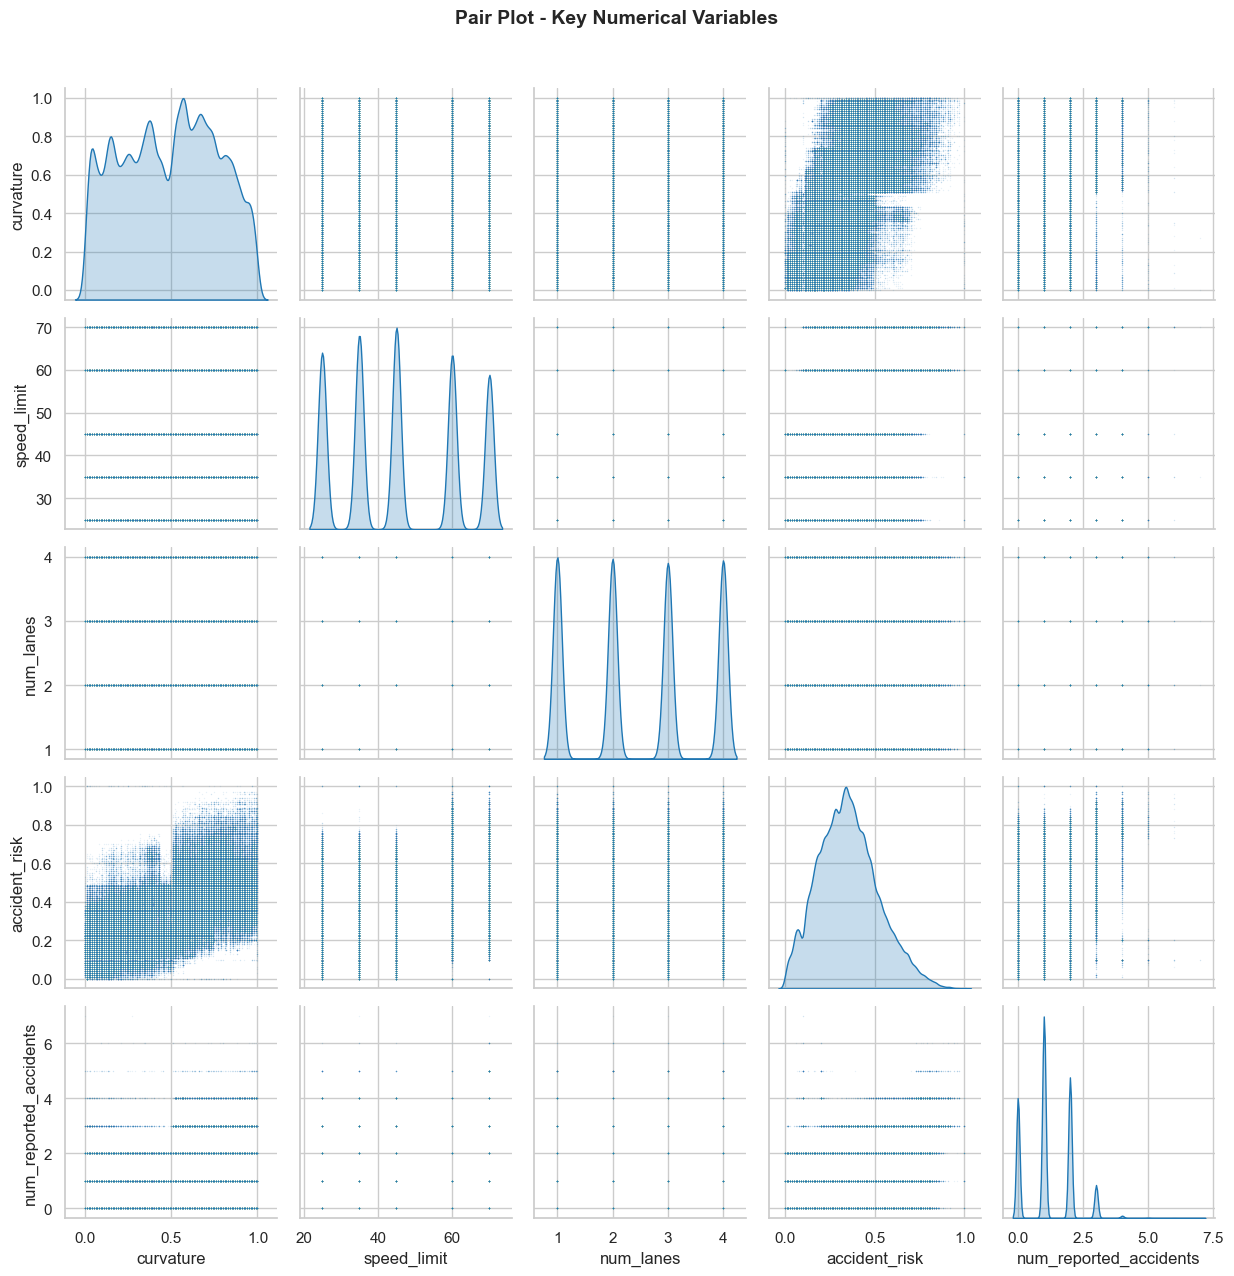

In [15]:
# Pair plot for key numerical variables to identify non-linear patterns
key_vars = ['curvature', 'speed_limit', 'num_lanes', 'accident_risk', 'num_reported_accidents']
sns.pairplot(df[key_vars], diag_kind='kde', plot_kws={'alpha': 0.1, 's': 1})
plt.suptitle('Pair Plot - Key Numerical Variables', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


Spearman Correlation (Non-linear monotonic relationships):


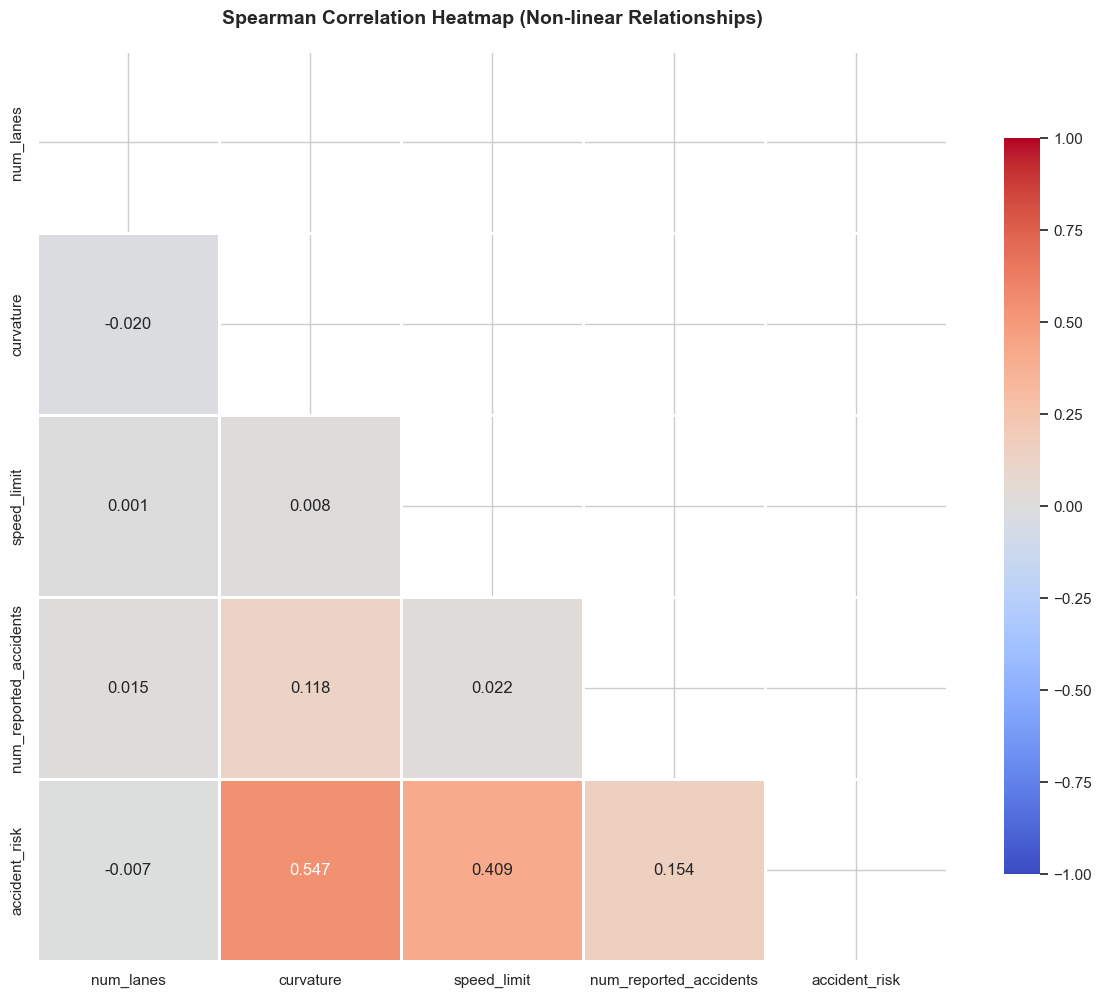


Comparison: Pearson vs Spearman correlation with accident_risk:
                         Pearson  Spearman  Difference
num_reported_accidents  0.213891  0.154263    0.059628
speed_limit             0.430898  0.409144    0.021754
curvature               0.543946  0.546774    0.002828
num_lanes              -0.006003 -0.007231    0.001228


In [16]:
# Calculate Spearman correlation (captures non-linear monotonic relationships)
print("Spearman Correlation (Non-linear monotonic relationships):")
print("="*60)
spearman_corr = df[numerical_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
sns.heatmap(spearman_corr, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            mask=mask, vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap (Non-linear Relationships)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Compare Pearson vs Spearman for accident_risk
print("\nComparison: Pearson vs Spearman correlation with accident_risk:")
print("="*60)
pearson_corr = correlation_matrix['accident_risk']
spearman_corr_target = spearman_corr['accident_risk']

comparison_df = pd.DataFrame({
    'Pearson': pearson_corr,
    'Spearman': spearman_corr_target,
    'Difference': abs(pearson_corr - spearman_corr_target)
}).sort_values('Difference', ascending=False)

print(comparison_df[comparison_df.index != 'accident_risk'])


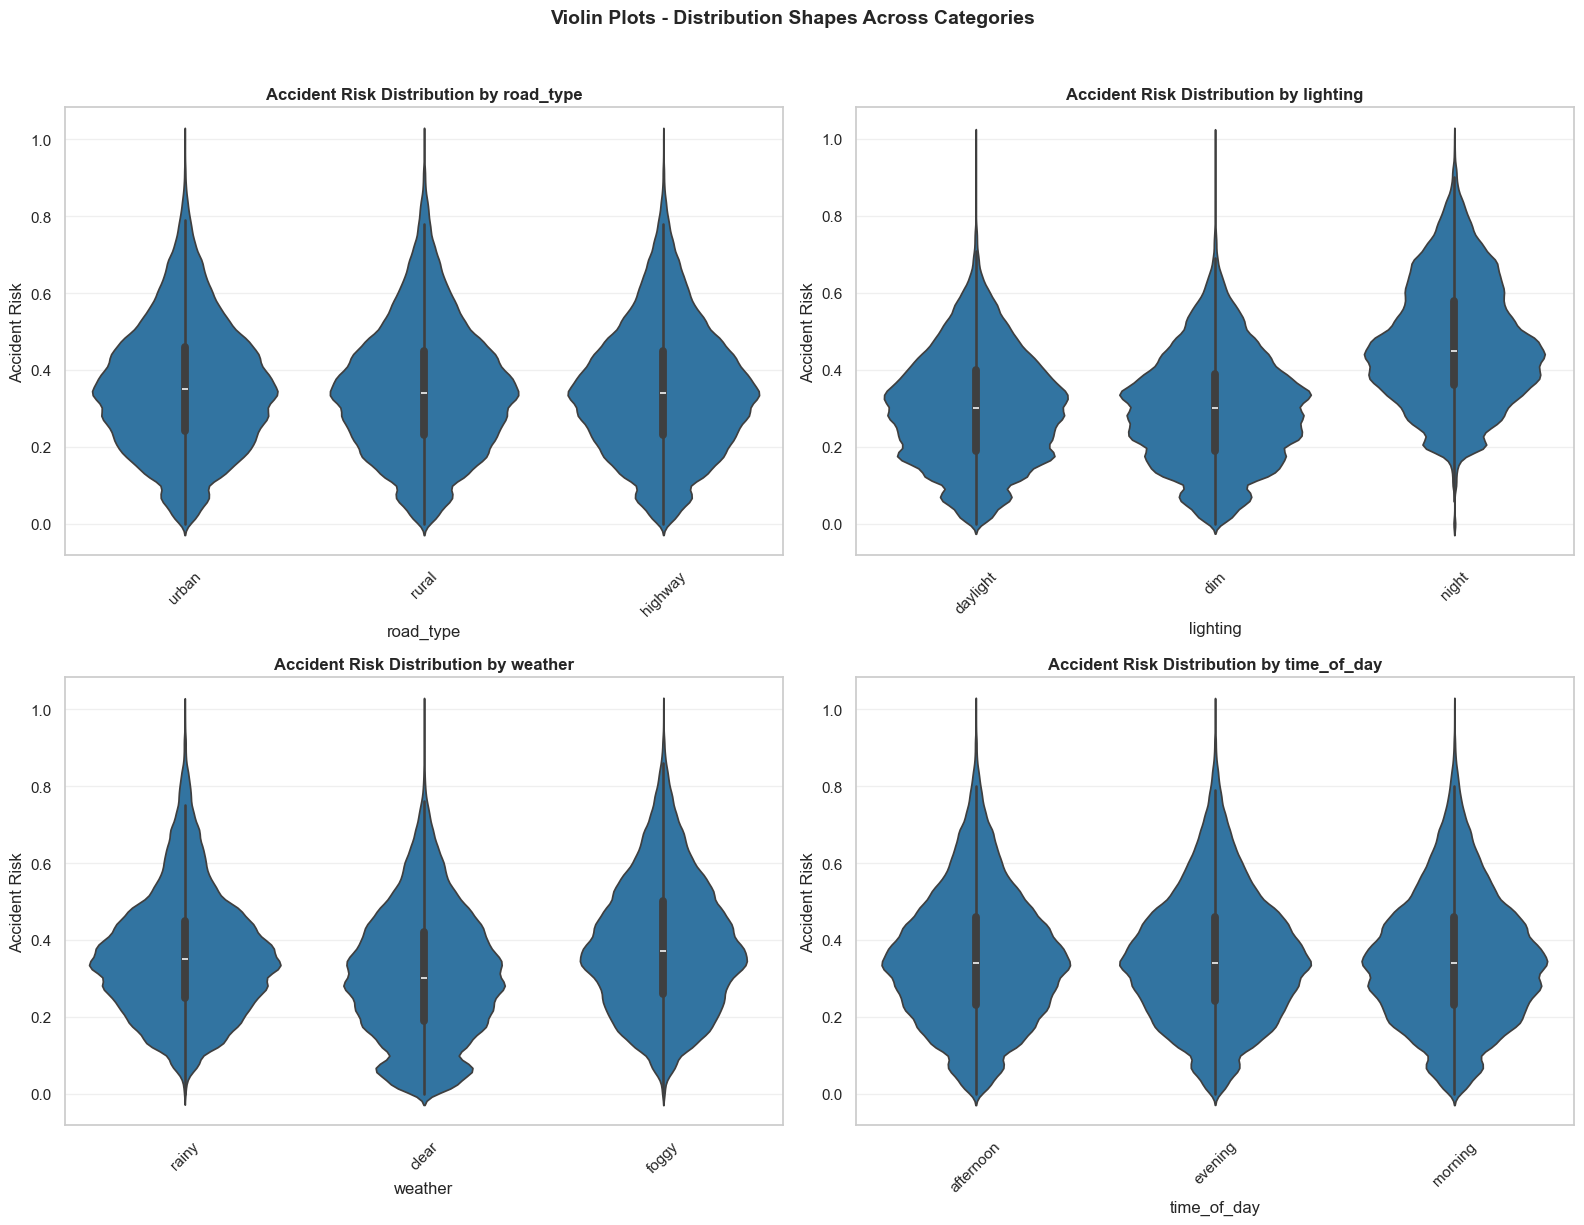

In [17]:
# Violin plots to show distribution shapes across categories (non-linear patterns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, cat_col in enumerate(categorical_cols[:4]):
    sns.violinplot(data=df, x=cat_col, y='accident_risk', ax=axes[idx])
    axes[idx].set_title(f'Accident Risk Distribution by {cat_col}', fontweight='bold')
    axes[idx].set_xlabel(cat_col)
    axes[idx].set_ylabel('Accident Risk')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Violin Plots - Distribution Shapes Across Categories', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 8. Summary Statistics and Key Insights


In [18]:
# Summary of key findings
print("="*60)
print("EDA SUMMARY - KEY FINDINGS")
print("="*60)

print("\n1. Dataset Overview:")
print(f"   - Total records: {len(df):,}")
print(f"   - Features: {len(df.columns)}")
print(f"   - Missing values: {df.isnull().sum().sum()}")

print("\n2. Target Variable (accident_risk):")
print(f"   - Mean: {df['accident_risk'].mean():.4f}")
print(f"   - Median: {df['accident_risk'].median():.4f}")
print(f"   - Std: {df['accident_risk'].std():.4f}")
print(f"   - Range: [{df['accident_risk'].min():.4f}, {df['accident_risk'].max():.4f}]")

print("\n3. Strongest Correlations with accident_risk (Pearson):")
top_corr = correlation_matrix['accident_risk'].abs().sort_values(ascending=False)
for var in top_corr.index[1:4]:  # Top 3 excluding itself
    print(f"   - {var}: {correlation_matrix.loc[var, 'accident_risk']:.4f}")

print("\n4. Categorical Variable Distributions:")
for col in categorical_cols:
    print(f"   - {col}: {df[col].nunique()} unique values")
    print(f"     Most common: {df[col].mode()[0]} ({df[col].value_counts().iloc[0]:,} occurrences)")

print("\n" + "="*60)


EDA SUMMARY - KEY FINDINGS

1. Dataset Overview:
   - Total records: 517,754
   - Features: 15
   - Missing values: 608

2. Target Variable (accident_risk):
   - Mean: 0.3524
   - Median: 0.3400
   - Std: 0.1664
   - Range: [0.0000, 1.0000]

3. Strongest Correlations with accident_risk (Pearson):
   - curvature: 0.5439
   - speed_limit: 0.4309
   - num_reported_accidents: 0.2139

4. Categorical Variable Distributions:
   - road_type: 3 unique values
     Most common: highway (173,672 occurrences)
   - lighting: 3 unique values
     Most common: dim (183,826 occurrences)
   - weather: 3 unique values
     Most common: foggy (181,463 occurrences)
   - time_of_day: 3 unique values
     Most common: morning (173,410 occurrences)

